In [1]:
import IPython
import librosa.display 
import librosa 
import glob
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, KFold, cross_val_score

sr = 44100

## „Éá„Éº„ÇøË™≠„ÅøËæº„Åø
- dicomo„ÅØÂØùÂÆ§„Éª„Ç≠„ÉÉ„ÉÅ„É≥„Éª„É™„Éì„É≥„Ç∞„ÅÆÈ†ÜÁï™

In [2]:
listMOBI = glob.glob('*mobi.WAV')
wav_listMOBI = sorted(listMOBI) #glob„ÅØ„Åê„Å°„ÇÉ„Åê„Å°„ÇÉ„Å™„ÅÆ„Åß‰∏¶„Åπ„Çã
mobi_list = [i for i in range(11)]
for i in range(11):
    print("„Éª", end="")
    mobi_list[i], sr = librosa.load(wav_listMOBI[i], sr=44100)
print("done!")

„Éª„Éª„Éª„Éª„Éª„Éª„Éª„Éª„Éª„Éª„Éªdone!


In [3]:
#import IPython.display
#IPython.display.Audio(wav_listMOBI[10])

In [4]:
dicomo_list = glob.glob("/Users/tomokijoya/Labolatory/Â≠¶‰ºö/DICOMO/Arpli27_joya/data_DICOMO_joya/*.wav" )

Dlist = [i for i in range(3)]
for i in range(3):
    print(".", end="")
    Dlist[i], sr = librosa.load(dicomo_list[i], sr=44100)
print("")
print("done!")

...
done!


In [34]:
dicomo_list

['/Users/tomokijoya/Labolatory/Â≠¶‰ºö/DICOMO/Arpli27_joya/data_DICOMO_joya/bedroom_2.wav',
 '/Users/tomokijoya/Labolatory/Â≠¶‰ºö/DICOMO/Arpli27_joya/data_DICOMO_joya/kitchen_2.wav',
 '/Users/tomokijoya/Labolatory/Â≠¶‰ºö/DICOMO/Arpli27_joya/data_DICOMO_joya/living_2.wav']

## Ë®ìÁ∑¥„Éá„Éº„Çø„ÅÆÊï¥ÂΩ¢
„Å®„Çä„ÅÇ„Åà„Åö4Áßí„Åö„Å§

In [6]:
#ÂÖ®‰Ωì„ÅÆÈï∑„Åï„ÅØ„Éê„É©„Éê„É©„ÅßËâØ„ÅÑ
def arangeList4(a_list, total_time, one_time, sr):
    b_list = a_list[:] #„Çπ„É©„Ç§„Çπ„Çí‰Ωø„Å£„Å¶„Ç≥„Éî„Éº
    for i in range(len(a_list)):
        if total_time*sr < len(a_list[i]):
            left = (len(a_list[i]) - total_time*sr) // 2
            b_list[i] = a_list[i][left :left + total_time*sr]
        
        else:
            b_list[i] = a_list[i][:]
   
    c_list = b_list[:]
    d_list = []
    e_list = []
   
    for l in range(len(c_list)): #„Çµ„É≥„Éó„É´„ÅÆÊï∞
        for k in range(int((len(c_list[l]))//(one_time*sr))): #‰∏Ä„Å§ÂΩì„Åü„Çä„ÅÆÊï∞
            x = c_list[l][one_time*sr*k : one_time*sr*(k+1)]
            d_list.append(x)
        e_list.append(d_list)
        d_list = [] #Ê¨°„ÅÆ„É´„Éº„Éó„Å´Âêë„Åë„Å¶ÂàùÊúüÂåñ
    
    return e_list

In [7]:
aranged = arangeList4(mobi_list, 120, 10, sr)
for i in range(11):
    print(len(aranged[i]))

6
12
12
12
12
12
12
12
12
12
12


## Ë°åÂãï„É©„Éô„É´„Çí‰ΩúÊàê
0: ÊéÉÈô§Ê©ü .... 10: Â£∞

In [8]:
label_list = []
for i in range(11):
    tmp = np.full(len(aranged[i]), i)
    label_list = np.append(label_list, tmp)
label_list.shape

(126,)

In [9]:
df_label_train = pd.DataFrame(label_list)
df_label_train.columns = ["action"]
#df_label_train

In [10]:
def makeTokucho_more(a_list):
    sr = 44100
    tokucho1 = [] 
  
    for i in range(len(a_list)): #„Å§„Åæ„Çä21or42(i„ÅØ0~20or41)
        print(i,"ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ")
        for j in range(len(a_list[i])): #„Å§„Åæ„Çä29
            y = a_list[i][j]
            tokucho_librosa = []
        
            MFCC = librosa.feature.mfcc(y=y, sr=sr)#, frame_length=sr*60)
            #FLATNESS = librosa.feature.spectral_flatness(y=y)
            #ZCR = librosa.feature.zero_crossing_rate(y=y)#, frame_length=sr)
            #CENTROID = librosa.feature.spectral_centroid(y=y, sr=sr)
            #RMS = librosa.feature.rms(y=y)#, frame_length=sr)
            #ROLLOFF = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95)
            
            
            #tokucho_librosa = [np.mean(FLATNESS),np.amax(FLATNESS),np.amin(FLATNESS),np.var(FLATNESS)]
            #tokucho_librosa += [np.mean(ZCR),np.amax(ZCR),np.amin(ZCR),np.var(ZCR)]
            #tokucho_librosa += [np.mean(CENTROID),np.amax(CENTROID),np.amin(CENTROID),np.var(CENTROID)]
            #tokucho_librosa += [np.mean(RMS),np.amax(RMS),np.amin(RMS),np.var(RMS)]
            #tokucho_librosa += [np.mean(ROLLOFF),np.amax(ROLLOFF),np.amin(ROLLOFF),np.var(ROLLOFF)]
            
            
            for e in MFCC:
                tokucho_librosa += [np.mean(e),np.amax(e),np.amin(e), np.var(e)]
    
            
            tokucho_librosa.append(0) #„É©„Éô„É´
            tokucho1.append(tokucho_librosa)            
            print(".",end="")
        print("")
    print("done!!")
    return tokucho1

In [11]:
#feature = makeTokucho_new(aranged)
feature = makeTokucho_more(aranged)

0 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
......
1 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
2 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
3 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
4 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
5 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
6 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
7 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
8 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
9 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
10 ÂõûÁõÆ„ÅÆ„É´„Éº„ÉóÈñãÂßãÔºÅ
............
done!!


In [12]:
sound_features = [#'FLATNESS',
                  #'ZCR', 
                  #'CENTROID',
                  #'RMS',
                  #'ROLLOFF',
                  'MFCC']
features = ['mean', 'max', 'min', 'var']

header = ''
for name in sound_features:
    if name != 'MFCC':
        for kind in features:
            header += f" {name}_{kind}" #„Çπ„Éö„Éº„ÇπÂå∫Âàá„Çä„Å™„ÅÆ„Åß„Çπ„Éö„Éº„Çπ„ÅåÂ§ß‰∫ã
    else:
        for mfcc_number in range(0,20):
            for kind in features:
                header += f" {name}{mfcc_number}_{kind}"
            
header += ' label'      #„Éò„ÉÉ„ÉÄ„Éº„Å´label(„Ç∏„É£„É≥„É´)„Çí„Å§„Åë„Çã=======with„Å™„ÇâÂøÖË¶Å=========
header = header.split() #Âå∫Âàá„ÇäÊñáÂ≠ó„ÅßÂàÜÂâ≤„Åô„Çã

In [13]:
len(header)

81

In [14]:
df = pd.DataFrame(feature)
df.columns = header

len_all = len(aranged[0])+len(aranged[1])
len_liv = len(aranged[9])+len(aranged[10])
len_kit = len(aranged[3])+len(aranged[4])+len(aranged[5])+len(aranged[6])+len(aranged[7])+len(aranged[8])
len_bed = len(aranged[2])

df.iloc[:len_all, len(header)-1:] = 3
df.iloc[len_all:len_all+len_bed, len(header)-1:] = 2
df.iloc[len_all+len_bed:len_all+len_bed+len_kit, len(header)-1:] = 1
df.iloc[len_all+len_bed+len_kit:len_all+len_bed+len_kit+len_liv, len(header)-1:] = 0
df

MFCC0_mean   MFCC0_max   MFCC0_min    MFCC0_var  MFCC1_mean   MFCC1_max  \
0   -168.324051 -112.026283 -191.424301   115.578239   52.622128  103.300278   
1   -154.706177  -64.895203 -198.225281   870.483398   52.836784  107.281990   
2   -160.213730  -59.008038 -193.604721   217.877899   55.564384  119.670898   
3   -191.772049 -102.624115 -221.297791   276.846527   58.815010  126.262810   
4   -182.801086  -86.389488 -226.203293   405.662781   43.300125  106.317429   
..          ...         ...         ...          ...         ...         ...   
121 -518.375366 -352.528900 -713.825806  7004.583496  141.421692  235.901428   
122 -507.494476 -343.266876 -704.281433  5810.375977  161.447906  245.866638   
123 -522.130615 -386.470490 -716.665588  6013.252930  154.334900  246.013336   
124 -507.861084 -375.795044 -715.368530  4857.735352  147.852844  234.335175   
125 -513.647644 -363.138123 -719.741394  6008.451172  153.455276  231.181732   

     MFCC1_min    MFCC1_var  MFCC2_mean  MFCC2_max  ...  MFCC17_var  \
0    32.538982    93.065865  -37.182735 -18.471184  ...   24.201870   
1    20.137844   118.514458  -31.380747 -13.394420  ...   21.014986   
2    33.479294    99.956299  -27.992529  -5.004682  ...   16.981501   
3    31.429123    93.927750  -31.721848  -5.724632  ...   22.289797   
4    14.843580   231.162674  -31.134552 -10.542105  ...   20.879158   
..         ...          ...         ...        ...  ...         ...   
121 -19.368135  3195.870605   -6.014593  60.131592  ...   53.586926   
122 -17.323622  2521.705322   -4.478984  68.824211  ...   38.850502   
123   6.084406  2485.757568   -4.488111  72.926788  ...   54.458698   
124 -30.316553  2964.780762  -10.305351  70.253723  ...   51.680428   
125  -7.205204  2415.673096   -6.382669  71.506439  ...   58.135529   

     MFCC18_mean  MFCC18_max  MFCC18_min  MFCC18_var  MFCC19_mean  MFCC19_max  \
0      -0.992385   12.408917  -14.881140   18.993368    10.552118   24.238319   
1       1.859270   14.239447  -13.225426   21.887960    11.223223   29.123810   
2       0.507616   13.744943  -15.779369   18.634439     9.678190   21.152584   
3       1.406943   14.631100  -11.923616   17.247141    10.442810   20.826437   
4       0.047482   14.152119  -16.915091   20.075907     8.578962   22.900677   
..           ...         ...         ...         ...          ...         ...   
121     1.326940   19.367744  -17.712553   42.512264     0.364499   21.427197   
122     1.759255   22.106232  -20.607420   53.338284    -0.263788   22.767708   
123     1.397281   19.984859  -18.728897   49.067421     0.604797   20.438576   
124    -0.020201   22.889042  -21.091190   50.336918     2.352696   23.807785   
125     0.125273   29.362434  -25.902988   58.823689     3.332741   22.672729   

     MFCC19_min  MFCC19_var  label  
0     -3.477929   18.032597      3  
1     -2.575585   23.932095      3  
2     -3.237986   19.182447      3  
3     -2.755211   20.621555      3  
4     -8.173175   23.798542      3  
..          ...         ...    ...  
121  -25.968987   52.971359      0  
122  -20.106903   53.501732      0  
123  -20.061329   52.249527      0  
124  -17.587128   56.575691      0  
125  -19.058182   57.057335      0  

[126 rows x 81 columns]

In [15]:
#MFCC[0]„ÇíÈô§Âéª
df = pd.concat([df, df_label_train], axis=1)
#df = df.drop(["MFCC0_mean", "MFCC0_max", "MFCC0_min", "MFCC0_var"],axis=1)
df

MFCC0_mean   MFCC0_max   MFCC0_min    MFCC0_var  MFCC1_mean   MFCC1_max  \
0   -168.324051 -112.026283 -191.424301   115.578239   52.622128  103.300278   
1   -154.706177  -64.895203 -198.225281   870.483398   52.836784  107.281990   
2   -160.213730  -59.008038 -193.604721   217.877899   55.564384  119.670898   
3   -191.772049 -102.624115 -221.297791   276.846527   58.815010  126.262810   
4   -182.801086  -86.389488 -226.203293   405.662781   43.300125  106.317429   
..          ...         ...         ...          ...         ...         ...   
121 -518.375366 -352.528900 -713.825806  7004.583496  141.421692  235.901428   
122 -507.494476 -343.266876 -704.281433  5810.375977  161.447906  245.866638   
123 -522.130615 -386.470490 -716.665588  6013.252930  154.334900  246.013336   
124 -507.861084 -375.795044 -715.368530  4857.735352  147.852844  234.335175   
125 -513.647644 -363.138123 -719.741394  6008.451172  153.455276  231.181732   

     MFCC1_min    MFCC1_var  MFCC2_mean  MFCC2_max  ...  MFCC18_mean  \
0    32.538982    93.065865  -37.182735 -18.471184  ...    -0.992385   
1    20.137844   118.514458  -31.380747 -13.394420  ...     1.859270   
2    33.479294    99.956299  -27.992529  -5.004682  ...     0.507616   
3    31.429123    93.927750  -31.721848  -5.724632  ...     1.406943   
4    14.843580   231.162674  -31.134552 -10.542105  ...     0.047482   
..         ...          ...         ...        ...  ...          ...   
121 -19.368135  3195.870605   -6.014593  60.131592  ...     1.326940   
122 -17.323622  2521.705322   -4.478984  68.824211  ...     1.759255   
123   6.084406  2485.757568   -4.488111  72.926788  ...     1.397281   
124 -30.316553  2964.780762  -10.305351  70.253723  ...    -0.020201   
125  -7.205204  2415.673096   -6.382669  71.506439  ...     0.125273   

     MFCC18_max  MFCC18_min  MFCC18_var  MFCC19_mean  MFCC19_max  MFCC19_min  \
0     12.408917  -14.881140   18.993368    10.552118   24.238319   -3.477929   
1     14.239447  -13.225426   21.887960    11.223223   29.123810   -2.575585   
2     13.744943  -15.779369   18.634439     9.678190   21.152584   -3.237986   
3     14.631100  -11.923616   17.247141    10.442810   20.826437   -2.755211   
4     14.152119  -16.915091   20.075907     8.578962   22.900677   -8.173175   
..          ...         ...         ...          ...         ...         ...   
121   19.367744  -17.712553   42.512264     0.364499   21.427197  -25.968987   
122   22.106232  -20.607420   53.338284    -0.263788   22.767708  -20.106903   
123   19.984859  -18.728897   49.067421     0.604797   20.438576  -20.061329   
124   22.889042  -21.091190   50.336918     2.352696   23.807785  -17.587128   
125   29.362434  -25.902988   58.823689     3.332741   22.672729  -19.058182   

     MFCC19_var  label  action  
0     18.032597      3     0.0  
1     23.932095      3     0.0  
2     19.182447      3     0.0  
3     20.621555      3     0.0  
4     23.798542      3     0.0  
..          ...    ...     ...  
121   52.971359      0    10.0  
122   53.501732      0    10.0  
123   52.249527      0    10.0  
124   56.575691      0    10.0  
125   57.057335      0    10.0  

[126 rows x 82 columns]

In [16]:
print("„É™„Éì„É≥„Ç∞",len(df[df["label"]==0]))
print("„Ç≠„ÉÉ„ÉÅ„É≥",len(df[df["label"]==1]))
print("ÂØùÂÆ§",len(df[df["label"]==2]))
print("„Åù„ÅÆ‰ªñ",len(df[df["label"]==3]))
print("„ÅÇ„Çä„Åà„Å™„ÅÑ",len(df[df["label"]==5]))

„É™„Éì„É≥„Ç∞ 24
„Ç≠„ÉÉ„ÉÅ„É≥ 72
ÂØùÂÆ§ 12
„Åù„ÅÆ‰ªñ 18
„ÅÇ„Çä„Åà„Å™„ÅÑ 0


## „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆÊï¥ÂΩ¢

## RMS„ÇíË®àÁÆó

In [38]:
def RMS(a_list, cut_time, sr):
    b_list = a_list[:]
    rms_list = a_list[:]
    for i in range(len(a_list)):
        b_list[i] = a_list[i][cut_time*sr: -cut_time*sr]
        rms_list[i] =  librosa.feature.rms(y=b_list[i]).mean()
    return rms_list

In [39]:
rms_list = RMS(Dlist, 10, 44100)

In [40]:
rms_list

[0.00043386375, 0.00043983094, 0.00041980162]

In [17]:
def arangeList(a_list, cut_time, total_time, one_time, sampling_rate):
    b_list = a_list[:] #„Çπ„É©„Ç§„Çπ„Çí‰Ωø„Å£„Å¶„Ç≥„Éî„Éº
    if cut_time != 0:
        for i in range(len(a_list)):
            b_list[i] = a_list[i][cut_time*sampling_rate:-cut_time*sampling_rate] #cut_timeÁßí„Å†„ÅëÂâçÂæå„ÇíÂâäÈô§
    else:
        for i in range(len(a_list)):
            b_list[i] = a_list[i][:]
   
    c_list = b_list[:]
    for j in range(len(b_list)):
        c_list[j] = b_list[j][:total_time*sampling_rate] #ÂÖ®‰Ωì„Çítotal_timeÁßí„Å´„Åô„Çã
        
    d_list = []
    e_list = []
   
    for l in range(len(c_list)): #„Çµ„É≥„Éó„É´„ÅÆÊï∞
        for k in range(int((len(c_list[l]))//(one_time*sampling_rate))): #‰∏Ä„Å§ÂΩì„Åü„Çä„ÅÆÊï∞
            x = c_list[l][one_time*sampling_rate*k : one_time*sampling_rate*(k+1)]
            d_list.append(x)
        e_list.append(d_list)
        d_list = [] #Ê¨°„ÅÆ„É´„Éº„Éó„Å´Âêë„Åë„Å¶ÂàùÊúüÂåñ
    
    return e_list

In [18]:
arangedD = arangeList(Dlist, 10, 20*60, 10, sr)

In [44]:
len(arangedD)

3

In [77]:
def RMS_threshold(a_list, rms_list, sr):
    use_list = []
    for i in range(len(a_list)):
        tmp = []
        for j in range(len(a_list[i])):
            rms = librosa.feature.rms(y=a_list[i][j]).mean()
            if rms >= rms_list[i]:
                tmp.append(a_list[i][j])
            else:
                pass
        use_list.append()
    return use_list

In [78]:
use_list = RMS_threshold(arangedD, rms_list, sr)

TypeError: append() takes exactly one argument (0 given)

In [70]:
q= np.zeros((3,4)).tolist()
q

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0]]

In [19]:
def makeTokucho_more2(a_list):
    tokucho1 = [] 
  
    for i in range(len(a_list)): #„Å§„Åæ„Çä21or42(i„ÅØ0~20or41)
        for j in range(len(a_list[i])): #„Å§„Åæ„Çä29
            y = a_list[i][j]
            tokucho_librosa = []
            
            MFCC = librosa.feature.mfcc(y=y, sr=sr)#, frame_length=sr*60)
            #FLATNESS = librosa.feature.spectral_flatness(y=y)
            #ZCR = librosa.feature.zero_crossing_rate(y=y)#, frame_length=sr)
            #CENTROID = librosa.feature.spectral_centroid(y=y, sr=sr)
            #RMS = librosa.feature.rms(y=y)#, frame_length=sr)
            #ROLLOFF = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.95)
            
            
            #tokucho_librosa = [np.mean(FLATNESS),np.amax(FLATNESS),np.amin(FLATNESS),np.var(FLATNESS)]
            #tokucho_librosa += [np.mean(ZCR),np.amax(ZCR),np.amin(ZCR),np.var(ZCR)]
            #tokucho_librosa += [np.mean(CENTROID),np.amax(CENTROID),np.amin(CENTROID),np.var(CENTROID)]
            #tokucho_librosa += [np.mean(RMS),np.amax(RMS),np.amin(RMS),np.var(RMS)]
            #tokucho_librosa += [np.mean(ROLLOFF),np.amax(ROLLOFF),np.amin(ROLLOFF),np.var(ROLLOFF)]
            
            for e in MFCC:
                tokucho_librosa += [np.mean(e),np.amax(e),np.amin(e), np.var(e)]
            
           
            tokucho_librosa.append(0) #Ê≠£Ëß£„É©„Éô„É´
            
            
            tokucho1.append(tokucho_librosa)            
        
            
        print(".", end="")
    print("done!")
    return tokucho1

In [20]:
D_feature = makeTokucho_more2(arangedD)

...done!


In [21]:
sound_features = [#'FLATNESS',
                  #'ZCR', 
                  #'CENTROID',
                  #'RMS',
                  #'ROLLOFF',
                  'MFCC']
features = ['mean', 'max', 'min', 'var']

headerS = ''
for name in sound_features:
    if name != 'MFCC':
        for kind in features:
            headerS += f" {name}_{kind}" #„Çπ„Éö„Éº„ÇπÂå∫Âàá„Çä„Å™„ÅÆ„Åß„Çπ„Éö„Éº„Çπ„ÅåÂ§ß‰∫ã
    else:
        for mfcc_number in range(0,20):
            for kind in features:
                headerS += f" {name}{mfcc_number}_{kind}"
            
headerS += ' label'      #„Éò„ÉÉ„ÉÄ„Éº„Å´label(„Ç∏„É£„É≥„É´)„Çí„Å§„Åë„Çã=======with„Å™„ÇâÂøÖË¶Å=========
headerS = headerS.split() #Âå∫Âàá„ÇäÊñáÂ≠ó„ÅßÂàÜÂâ≤„Åô„Çã
#headerS

In [22]:
df_D = pd.DataFrame(D_feature)

In [23]:
df_D

0           1           2           3          4           5   \
0   -674.003174 -529.537109 -699.066650  286.185944  87.678093  138.994720   
1   -682.775208 -642.343689 -701.815979   61.094322  86.724495  104.008347   
2   -685.395569 -669.673950 -701.117004   25.689816  87.581413  106.483917   
3   -683.230042 -629.791199 -703.352417  111.078720  87.038498  123.833725   
4   -685.934021 -671.722717 -702.535583   28.931988  86.683708  105.686142   
..          ...         ...         ...         ...        ...         ...   
355 -692.297974 -666.491150 -711.141846   51.113037  80.793289  105.204910   
356 -686.247681 -638.517700 -712.481873  107.931847  81.393982  102.788086   
357 -684.558289 -647.584717 -713.558533  164.231354  82.356598  112.161194   
358 -688.139038 -654.659729 -714.826660   94.805054  82.065361  110.818771   
359 -692.050415 -654.885254 -711.562378   73.987755  79.621078  104.171776   

            6          7          8          9   ...         71        72  \
0    56.470238  66.068001  25.040001  48.118046  ...  12.869480  3.676633   
1    66.989059  41.513477  30.375004  46.386932  ...  13.657596  3.573623   
2    70.238846  37.891296  33.873474  48.144569  ...  12.298942  4.212509   
3    65.909790  52.848663  31.726284  48.097893  ...  13.157673  3.791800   
4    69.745628  41.496494  33.084465  48.134888  ...  13.202985  4.083708   
..         ...        ...        ...        ...  ...        ...       ...   
355  60.580963  56.079494  32.962383  47.093819  ...  14.380390  2.455578   
356  59.360691  60.307533  27.831511  46.359653  ...  19.449375  3.534770   
357  56.755043  90.037178  26.104204  47.047577  ...  23.002251  1.991619   
358  59.392277  71.774826  31.038891  46.634987  ...  20.080069  3.397041   
359  58.426392  55.028942  31.897179  48.861343  ...  16.553394  3.491716   

            73         74         75        76         77         78  \
0    13.612933  -9.561205  13.981006  4.357531  14.485855  -7.258943   
1    14.848156  -8.996119  12.001032  3.709019  15.189389  -6.937483   
2    17.069283  -7.522915  12.148082  4.040816  14.391287  -7.413934   
3    15.724443  -7.281948  13.559076  3.714837  16.299547  -6.385404   
4    16.555988  -7.474205  13.416781  3.821816  15.117756  -5.666532   
..         ...        ...        ...       ...        ...        ...   
355  14.727291  -8.563456  15.675210  2.360357  14.138184  -8.254340   
356  16.912971  -7.103219  16.228464  2.420669  13.522213  -9.074435   
357  14.897638 -14.206735  18.086693  3.201516  17.804171 -12.368657   
358  16.928425  -9.893739  17.518312  3.410980  16.815205 -12.332718   
359  17.776997  -9.755285  17.204134  3.031036  16.024231  -8.462225   

            79  80  
0    12.865007   0  
1    12.870562   0  
2    11.401839   0  
3    11.342878   0  
4    10.804604   0  
..         ...  ..  
355  15.794446   0  
356  14.930676   0  
357  19.308249   0  
358  18.937769   0  
359  17.631744   0  

[360 rows x 81 columns]

In [24]:
df_D.columns = headerS
df_D

MFCC0_mean   MFCC0_max   MFCC0_min   MFCC0_var  MFCC1_mean   MFCC1_max  \
0   -674.003174 -529.537109 -699.066650  286.185944   87.678093  138.994720   
1   -682.775208 -642.343689 -701.815979   61.094322   86.724495  104.008347   
2   -685.395569 -669.673950 -701.117004   25.689816   87.581413  106.483917   
3   -683.230042 -629.791199 -703.352417  111.078720   87.038498  123.833725   
4   -685.934021 -671.722717 -702.535583   28.931988   86.683708  105.686142   
..          ...         ...         ...         ...         ...         ...   
355 -692.297974 -666.491150 -711.141846   51.113037   80.793289  105.204910   
356 -686.247681 -638.517700 -712.481873  107.931847   81.393982  102.788086   
357 -684.558289 -647.584717 -713.558533  164.231354   82.356598  112.161194   
358 -688.139038 -654.659729 -714.826660   94.805054   82.065361  110.818771   
359 -692.050415 -654.885254 -711.562378   73.987755   79.621078  104.171776   

     MFCC1_min  MFCC1_var  MFCC2_mean  MFCC2_max  ...  MFCC17_var  \
0    56.470238  66.068001   25.040001  48.118046  ...   12.869480   
1    66.989059  41.513477   30.375004  46.386932  ...   13.657596   
2    70.238846  37.891296   33.873474  48.144569  ...   12.298942   
3    65.909790  52.848663   31.726284  48.097893  ...   13.157673   
4    69.745628  41.496494   33.084465  48.134888  ...   13.202985   
..         ...        ...         ...        ...  ...         ...   
355  60.580963  56.079494   32.962383  47.093819  ...   14.380390   
356  59.360691  60.307533   27.831511  46.359653  ...   19.449375   
357  56.755043  90.037178   26.104204  47.047577  ...   23.002251   
358  59.392277  71.774826   31.038891  46.634987  ...   20.080069   
359  58.426392  55.028942   31.897179  48.861343  ...   16.553394   

     MFCC18_mean  MFCC18_max  MFCC18_min  MFCC18_var  MFCC19_mean  MFCC19_max  \
0       3.676633   13.612933   -9.561205   13.981006     4.357531   14.485855   
1       3.573623   14.848156   -8.996119   12.001032     3.709019   15.189389   
2       4.212509   17.069283   -7.522915   12.148082     4.040816   14.391287   
3       3.791800   15.724443   -7.281948   13.559076     3.714837   16.299547   
4       4.083708   16.555988   -7.474205   13.416781     3.821816   15.117756   
..           ...         ...         ...         ...          ...         ...   
355     2.455578   14.727291   -8.563456   15.675210     2.360357   14.138184   
356     3.534770   16.912971   -7.103219   16.228464     2.420669   13.522213   
357     1.991619   14.897638  -14.206735   18.086693     3.201516   17.804171   
358     3.397041   16.928425   -9.893739   17.518312     3.410980   16.815205   
359     3.491716   17.776997   -9.755285   17.204134     3.031036   16.024231   

     MFCC19_min  MFCC19_var  label  
0     -7.258943   12.865007      0  
1     -6.937483   12.870562      0  
2     -7.413934   11.401839      0  
3     -6.385404   11.342878      0  
4     -5.666532   10.804604      0  
..          ...         ...    ...  
355   -8.254340   15.794446      0  
356   -9.074435   14.930676      0  
357  -12.368657   19.308249      0  
358  -12.332718   18.937769      0  
359   -8.462225   17.631744      0  

[360 rows x 81 columns]

## rows„ÄÄ√ó columns„ÅÆrows√∑7„ÅÆÂÄ§„Åå‚Üì„Å´Êù•„Å™„ÅÑ„Å®„ÅÑ„Åë„Å™„ÅÑ(630„Å™„Çâ90)

In [25]:
df_D.columns = headerS
#Ê≠£Ëß£„ÅÆ„É©„Éô„É´

df_D.iloc[0:len(arangedD[0]),-1] = int(2)
df_D.iloc[len(arangedD[0]):len(arangedD[0]) + len(arangedD[1]),-1] = int(1)
df_D.iloc[len(arangedD[0]) + len(arangedD[1]):len(arangedD[0]) + len(arangedD[1]) + len(arangedD[2]),-1] = int(0)

df_D

MFCC0_mean   MFCC0_max   MFCC0_min   MFCC0_var  MFCC1_mean   MFCC1_max  \
0   -674.003174 -529.537109 -699.066650  286.185944   87.678093  138.994720   
1   -682.775208 -642.343689 -701.815979   61.094322   86.724495  104.008347   
2   -685.395569 -669.673950 -701.117004   25.689816   87.581413  106.483917   
3   -683.230042 -629.791199 -703.352417  111.078720   87.038498  123.833725   
4   -685.934021 -671.722717 -702.535583   28.931988   86.683708  105.686142   
..          ...         ...         ...         ...         ...         ...   
355 -692.297974 -666.491150 -711.141846   51.113037   80.793289  105.204910   
356 -686.247681 -638.517700 -712.481873  107.931847   81.393982  102.788086   
357 -684.558289 -647.584717 -713.558533  164.231354   82.356598  112.161194   
358 -688.139038 -654.659729 -714.826660   94.805054   82.065361  110.818771   
359 -692.050415 -654.885254 -711.562378   73.987755   79.621078  104.171776   

     MFCC1_min  MFCC1_var  MFCC2_mean  MFCC2_max  ...  MFCC17_var  \
0    56.470238  66.068001   25.040001  48.118046  ...   12.869480   
1    66.989059  41.513477   30.375004  46.386932  ...   13.657596   
2    70.238846  37.891296   33.873474  48.144569  ...   12.298942   
3    65.909790  52.848663   31.726284  48.097893  ...   13.157673   
4    69.745628  41.496494   33.084465  48.134888  ...   13.202985   
..         ...        ...         ...        ...  ...         ...   
355  60.580963  56.079494   32.962383  47.093819  ...   14.380390   
356  59.360691  60.307533   27.831511  46.359653  ...   19.449375   
357  56.755043  90.037178   26.104204  47.047577  ...   23.002251   
358  59.392277  71.774826   31.038891  46.634987  ...   20.080069   
359  58.426392  55.028942   31.897179  48.861343  ...   16.553394   

     MFCC18_mean  MFCC18_max  MFCC18_min  MFCC18_var  MFCC19_mean  MFCC19_max  \
0       3.676633   13.612933   -9.561205   13.981006     4.357531   14.485855   
1       3.573623   14.848156   -8.996119   12.001032     3.709019   15.189389   
2       4.212509   17.069283   -7.522915   12.148082     4.040816   14.391287   
3       3.791800   15.724443   -7.281948   13.559076     3.714837   16.299547   
4       4.083708   16.555988   -7.474205   13.416781     3.821816   15.117756   
..           ...         ...         ...         ...          ...         ...   
355     2.455578   14.727291   -8.563456   15.675210     2.360357   14.138184   
356     3.534770   16.912971   -7.103219   16.228464     2.420669   13.522213   
357     1.991619   14.897638  -14.206735   18.086693     3.201516   17.804171   
358     3.397041   16.928425   -9.893739   17.518312     3.410980   16.815205   
359     3.491716   17.776997   -9.755285   17.204134     3.031036   16.024231   

     MFCC19_min  MFCC19_var  label  
0     -7.258943   12.865007      2  
1     -6.937483   12.870562      2  
2     -7.413934   11.401839      2  
3     -6.385404   11.342878      2  
4     -5.666532   10.804604      2  
..          ...         ...    ...  
355   -8.254340   15.794446      0  
356   -9.074435   14.930676      0  
357  -12.368657   19.308249      0  
358  -12.332718   18.937769      0  
359   -8.462225   17.631744      0  

[360 rows x 81 columns]

In [26]:
#MFCC
#df_D = df_D.drop(["MFCC0_mean", "MFCC0_max", "MFCC0_min", "MFCC0_var"],axis=1)

In [27]:
df_D.head()

MFCC0_mean   MFCC0_max   MFCC0_min   MFCC0_var  MFCC1_mean   MFCC1_max  \
0 -674.003174 -529.537109 -699.066650  286.185944   87.678093  138.994720   
1 -682.775208 -642.343689 -701.815979   61.094322   86.724495  104.008347   
2 -685.395569 -669.673950 -701.117004   25.689816   87.581413  106.483917   
3 -683.230042 -629.791199 -703.352417  111.078720   87.038498  123.833725   
4 -685.934021 -671.722717 -702.535583   28.931988   86.683708  105.686142   

   MFCC1_min  MFCC1_var  MFCC2_mean  MFCC2_max  ...  MFCC17_var  MFCC18_mean  \
0  56.470238  66.068001   25.040001  48.118046  ...   12.869480     3.676633   
1  66.989059  41.513477   30.375004  46.386932  ...   13.657596     3.573623   
2  70.238846  37.891296   33.873474  48.144569  ...   12.298942     4.212509   
3  65.909790  52.848663   31.726284  48.097893  ...   13.157673     3.791800   
4  69.745628  41.496494   33.084465  48.134888  ...   13.202985     4.083708   

   MFCC18_max  MFCC18_min  MFCC18_var  MFCC19_mean  MFCC19_max  MFCC19_min  \
0   13.612933   -9.561205   13.981006     4.357531   14.485855   -7.258943   
1   14.848156   -8.996119   12.001032     3.709019   15.189389   -6.937483   
2   17.069283   -7.522915   12.148082     4.040816   14.391287   -7.413934   
3   15.724443   -7.281948   13.559076     3.714837   16.299547   -6.385404   
4   16.555988   -7.474205   13.416781     3.821816   15.117756   -5.666532   

   MFCC19_var  label  
0   12.865007      2  
1   12.870562      2  
2   11.401839      2  
3   11.342878      2  
4   10.804604      2  

[5 rows x 81 columns]

# üåü‰Ωø„ÅÜ„Éá„Éº„Çø„ÇíÂé≥ÈÅ∏

In [28]:
df_use = pd.concat([
    df[df["action"]==0],
    df[df["action"]==1],
    df[df["action"]==2],
    df[df["action"]==3],
    df[df["action"]==4],
    df[df["action"]==5],
    df[df["action"]==6],
    #df[df["action"]==7],
    df[df["action"]==8],
    df[df["action"]==9],
    df[df["action"]==10]
])
df_use

MFCC0_mean   MFCC0_max   MFCC0_min    MFCC0_var  MFCC1_mean   MFCC1_max  \
0   -168.324051 -112.026283 -191.424301   115.578239   52.622128  103.300278   
1   -154.706177  -64.895203 -198.225281   870.483398   52.836784  107.281990   
2   -160.213730  -59.008038 -193.604721   217.877899   55.564384  119.670898   
3   -191.772049 -102.624115 -221.297791   276.846527   58.815010  126.262810   
4   -182.801086  -86.389488 -226.203293   405.662781   43.300125  106.317429   
..          ...         ...         ...          ...         ...         ...   
121 -518.375366 -352.528900 -713.825806  7004.583496  141.421692  235.901428   
122 -507.494476 -343.266876 -704.281433  5810.375977  161.447906  245.866638   
123 -522.130615 -386.470490 -716.665588  6013.252930  154.334900  246.013336   
124 -507.861084 -375.795044 -715.368530  4857.735352  147.852844  234.335175   
125 -513.647644 -363.138123 -719.741394  6008.451172  153.455276  231.181732   

     MFCC1_min    MFCC1_var  MFCC2_mean  MFCC2_max  ...  MFCC18_mean  \
0    32.538982    93.065865  -37.182735 -18.471184  ...    -0.992385   
1    20.137844   118.514458  -31.380747 -13.394420  ...     1.859270   
2    33.479294    99.956299  -27.992529  -5.004682  ...     0.507616   
3    31.429123    93.927750  -31.721848  -5.724632  ...     1.406943   
4    14.843580   231.162674  -31.134552 -10.542105  ...     0.047482   
..         ...          ...         ...        ...  ...          ...   
121 -19.368135  3195.870605   -6.014593  60.131592  ...     1.326940   
122 -17.323622  2521.705322   -4.478984  68.824211  ...     1.759255   
123   6.084406  2485.757568   -4.488111  72.926788  ...     1.397281   
124 -30.316553  2964.780762  -10.305351  70.253723  ...    -0.020201   
125  -7.205204  2415.673096   -6.382669  71.506439  ...     0.125273   

     MFCC18_max  MFCC18_min  MFCC18_var  MFCC19_mean  MFCC19_max  MFCC19_min  \
0     12.408917  -14.881140   18.993368    10.552118   24.238319   -3.477929   
1     14.239447  -13.225426   21.887960    11.223223   29.123810   -2.575585   
2     13.744943  -15.779369   18.634439     9.678190   21.152584   -3.237986   
3     14.631100  -11.923616   17.247141    10.442810   20.826437   -2.755211   
4     14.152119  -16.915091   20.075907     8.578962   22.900677   -8.173175   
..          ...         ...         ...          ...         ...         ...   
121   19.367744  -17.712553   42.512264     0.364499   21.427197  -25.968987   
122   22.106232  -20.607420   53.338284    -0.263788   22.767708  -20.106903   
123   19.984859  -18.728897   49.067421     0.604797   20.438576  -20.061329   
124   22.889042  -21.091190   50.336918     2.352696   23.807785  -17.587128   
125   29.362434  -25.902988   58.823689     3.332741   22.672729  -19.058182   

     MFCC19_var  label  action  
0     18.032597      3     0.0  
1     23.932095      3     0.0  
2     19.182447      3     0.0  
3     20.621555      3     0.0  
4     23.798542      3     0.0  
..          ...    ...     ...  
121   52.971359      0    10.0  
122   53.501732      0    10.0  
123   52.249527      0    10.0  
124   56.575691      0    10.0  
125   57.057335      0    10.0  

[114 rows x 82 columns]

In [29]:
df_use["label"].value_counts()

1    60
0    24
3    18
2    12
Name: label, dtype: int64

## „É¢„Éá„É´‰ΩúÊàê„Å®Ê§úË®º

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(df_use.iloc[:, :-2], dtype = float))
y_train = df_use["label"]
X_test = scaler.fit_transform(np.array(df_D.iloc[:, :-1], dtype = float))
y_test = df_D["label"]
    
print('trainX„ÅØ'+str(len(X_train)))
print('trainy„ÅØ'+str(len(y_train)))
print('testX„ÅØ'+str(len(X_test)))
print('testy„ÅØ'+str(len(y_test)))

trainX„ÅØ114
trainy„ÅØ114
testX„ÅØ360
testy„ÅØ360


In [31]:
def kondo1(X_test, y_test, model):
    names = ['living', 'kitchen', 'bedroom', 'other']
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    y_pred = model.predict(X_test)

#ÊúÄÂàù
    ax1 = plt.subplot()
    cm1 = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm1, annot = True, cmap='Blues', fmt =".0f",ax=ax1,cbar=False,square=True,
               xticklabels=names,
               yticklabels=names)


    from sklearn.metrics import classification_report
    
    print(classification_report(y_test, y_pred, target_names=names))
    #plt.savefig('seaborn_heatmap_living_1.pdf',bbox_inches='tight')

def kondo2(X_test, y_test, model):
    names = ['living', 'kitchen', 'bedroom', 'other']
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    y_pred = model.predict(X_test)


#„ÅÑ„Åò„Çã
    ax2 = plt.subplot()
    cm = confusion_matrix(y_test, y_pred)
    normed_c = (cm.T *100/ cm.astype(np.float).sum(axis=1)).T
    sns.heatmap(normed_c, annot = True, cmap='Blues', fmt =".1f",ax=ax2,cbar=False,square=True,
               xticklabels=names,
               yticklabels=names)
    #plt.savefig('seaborn_heatmap_bedroom_2.pdf',bbox_inches='tight')

In [32]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state=None)

model = model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_train = model.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_train)
    
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_test)

„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö 1.00
„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö 0.49


ValueError: Number of classes, 3, does not match size of target_names, 4. Try specifying the labels parameter

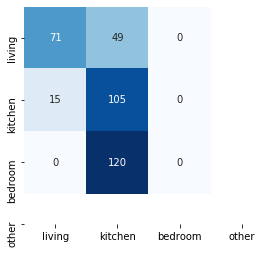

In [33]:
kondo1(X_test, y_test, model)

# „É©„É≥„ÉÄ„É†„Éï„Ç©„É¨„Çπ„Éà

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=1000)
clf = clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_train)
    
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_test = clf.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_test)

In [ ]:
kondo1(X_test, y_test, clf)

# LightGBM

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMClassifier(
    objective='binary',
    num_leaves=10,
    min_child_samples=20,
    max_depth=15
)
gbm = gbm.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_train = gbm.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_train)
    
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_test = gbm.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_test)

In [ ]:
kondo1(X_test, y_test, gbm)

# 1„Å§„Å´„Åæ„Å®„ÇÅ„Å¶„Åó„Åæ„Åä„ÅÜ

In [ ]:
def models(X_train, y_train, X_test, y_test, random=None):
    from sklearn.metrics import accuracy_score
    
    #SVM
    from sklearn.svm import SVC
    svm = SVC(kernel='rbf', random_state=random).fit(X_train, y_train)
    pred_train_svm = svm.predict(X_train)
    accuracy_train_svm = accuracy_score(y_train, pred_train_svm)
    print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø_SVMÔºö %.2f' % accuracy_train_svm)
    pred_test_svm = svm.predict(X_test)
    accuracy_test_svm = accuracy_score(y_test, pred_test_svm)
    print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø_SVMÔºö %.2f' % accuracy_test_svm)
    
    #RandomForest
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.datasets import make_classification

    forest = RandomForestClassifier(max_depth=10, random_state=0, n_estimators=14,).fit(X_train, y_train)
    pred_train_forest = forest.predict(X_train)
    accuracy_train_forest = accuracy_score(y_train, pred_train_forest)
    print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø_RandomForestÔºö %.2f' % accuracy_train_forest)
    pred_test_forest = forest.predict(X_test)
    accuracy_test_forest = accuracy_score(y_test, pred_test_forest)
    print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø_RandomForestÔºö %.2f' % accuracy_test_forest)
    
    #LightGBM
    import lightgbm as lgb
    gbm = lgb.LGBMClassifier(
        objective='binary',
        num_leaves=10,
        min_child_samples=20,
        max_depth=15
    ).fit(X_train, y_train)
    pred_train_gbm = gbm.predict(X_train)
    accuracy_train_gbm = accuracy_score(y_train, pred_train_gbm)
    print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø_gbmÔºö %.2f' % accuracy_train_gbm)
    pred_test_gbm = gbm.predict(X_test)
    accuracy_test_gbm = accuracy_score(y_test, pred_test_gbm)
    print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø_gbmÔºö %.2f' % accuracy_test_gbm)
    
    return svm, forest, gbm

In [ ]:
svm, forest, gbm = models(X_train, y_train, X_test, y_test, random=None)

In [ ]:
kondo1(X_test, y_test, svm)

# Ë®ìÁ∑¥„Éá„Éº„Çø„Å´„Åã„Åü„Çà„Çä„Åå„ÅÇ„Çã„ÅÆ„Åß„Å©„ÅÜ„Å´„Åã„Åô„Çã

In [ ]:
print("„É™„Éì„É≥„Ç∞",len(df[df["label"]==0]))
print("„Ç≠„ÉÉ„ÉÅ„É≥",len(df[df["label"]==1]))
print("ÂØùÂÆ§",len(df[df["label"]==2]))
print("„Åù„ÅÆ‰ªñ",len(df[df["label"]==3]))

## „ÉÄ„Ç¶„É≥„Çµ„É≥„Éó„É™„É≥„Ç∞
‰∏ÄÁï™„É©„Éô„É´„ÅÆÊï∞„ÅåÂ∞ë„Å™„ÅÑ„ÅÆ„ÅØ2„Å™„ÅÆ„Åß„ÄÅ0„ÅØlivÂÄç„ÄÅ1„ÅØkitÂÄç, 2„ÅØbedÂÄç„Åó„Å¶„Çã„ÄÇ(liv,bed„ÅØÊï¥Êï∞)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

positive_count_train = y_train.value_counts()[2] #„É™„Éì„É≥„Ç∞=0„ÅÆÊï∞

liv=2
kit=2
bed=1
strategy = {0:positive_count_train*liv, 1:positive_count_train*kit, 2:positive_count_train*bed}

rus = RandomUnderSampler(random_state=77, sampling_strategy = strategy)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
y_resampled.value_counts()

In [ ]:
from sklearn.svm import SVC
model2 = SVC(kernel='linear', random_state=None)

model2 = model.fit(X_resampled, y_resampled)

from sklearn.metrics import accuracy_score
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_train = model2.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_train)
    
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_test = model2.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_test)

In [ ]:
kondo1(X_test, y_test, model2)

## „É™„Éì„É≥„Ç∞„ÅÆÁ≤æÂ∫¶„ÅåÊÇ™„ÅÑÔºÅ
„ÉÜ„É¨„Éì„ÅØÂêå„Åò„Å™„ÅÆ„Å´„Å©„ÅÜ„Åó„Å¶‚Ä¶

## „ÉÜ„É¨„Éì„ÅÆÈü≥Â£∞„Å†„Åë„Åß„ÉÜ„Çπ„Éà„Åó„Å¶„Åø„Çã

In [ ]:
df_ATJ

In [ ]:
df_ATJ_nonVoice = df_ATJ[df_ATJ["action"] != 1]
df_ATJ_nonVoice

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(df_use.iloc[:, :-2], dtype = float))
y_train = df_use["label"]
X_test = scaler.fit_transform(np.array(df_ATJ_nonVoice.iloc[:, :-4], dtype = float))
y_test = df_ATJ_nonVoice["label"]
    
print('trainX„ÅØ'+str(len(X_train)))
print('trainy„ÅØ'+str(len(y_train)))
print('testX„ÅØ'+str(len(X_test)))
print('testy„ÅØ'+str(len(y_test)))

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=None)

model = model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_train = model.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_train)
    
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_test)

In [ ]:
kondo1(X_test, y_test, model)

### „ÉÜ„É¨„Éì„Çí„ÉÜ„É¨„Éì„Å®Ë™çË≠ò„Åó„Å™„ÅÑ‚Ä¶

In [ ]:
df_ATJ_nonTV = df_ATJ[df_ATJ["action"] != 0]
#df_ATJ_nonTV

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(np.array(df_use.iloc[:, :-2], dtype = float))
y_train = df_use["label"]
X_test = scaler.fit_transform(np.array(df_ATJ_nonTV.iloc[:, :-4], dtype = float))
y_test = df_ATJ_nonTV["label"]
    
print('trainX„ÅØ'+str(len(X_train)))
print('trainy„ÅØ'+str(len(y_train)))
print('testX„ÅØ'+str(len(X_test)))
print('testy„ÅØ'+str(len(y_test)))

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=None)

model = model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
# „Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_train = model.predict(X_train)

accuracy_train = accuracy_score(y_train, pred_train)

print('„Éà„É¨„Éº„Éã„É≥„Ç∞„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_train)
    
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÁ≤æÂ∫¶
pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, pred_test)


print('„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„ÇãÊ≠£Ëß£ÁéáÔºö %.2f' % accuracy_test)

In [ ]:
kondo1(X_test, y_test, model)